In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [362]:
data = pd.read_csv('Data/redcard.csv')

In [363]:
data.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [364]:
data.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [365]:
data = data.dropna()

In [366]:
data.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

# Are Referees Racist?

To begin the analysis, the first pass was to evaluate if on average referees were more likely to give red cards to players based on their average skin-tone.

In [368]:
print("5-Point ranking for player skin tone.")
print()
print("White Players: {:0.1f}, POC Players: {:0.1f}".format(data['rater1'].min(), data['rater1'].max()))

skin_tones = data['rater1'].unique()
skin_tones.sort()
skin_tones = np.array(skin_tones)
print(["{:0.2f}".format(skin) for skin in skin_tones])

5-Point ranking for player skin tone.

White Players: 0.0, POC Players: 1.0
['0.00', '0.25', '0.50', '0.75', '1.00']


The likelihood of skin tone ranking between the two individual rating is shown below.

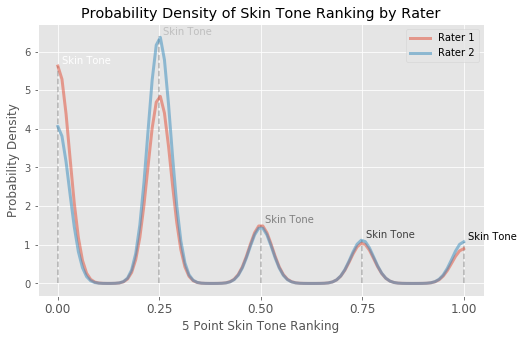

In [369]:
rater1_dist = stats.gaussian_kde(data['rater1'])
rater2_dist = stats.gaussian_kde(data['rater2'])
rating = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 5))
plt.plot(rating, rater1_dist.pdf(rating), linewidth=3, alpha=0.5, label='Rater 1')
plt.plot(rating, rater2_dist.pdf(rating), linewidth=3, alpha=0.5, label='Rater 2')

color = plt.cm.gray_r(np.linspace(0, 1, 5))
for i, skin_tone in enumerate(skin_tones):
    vmax = max([rater1_dist.pdf(skin_tone), rater2_dist.pdf(skin_tone)])
    plt.text(skin_tone + 0.01, vmax + 0.05, 'Skin Tone', color=color[i])
    plt.vlines(skin_tone, 0, vmax, color='k', linestyle='--', alpha=0.25)
    
plt.title('Probability Density of Skin Tone Ranking by Rater')
plt.xlabel('5 Point Skin Tone Ranking')
plt.xticks(skin_tones, ["{:0.2f}".format(skin) for skin in skin_tones], fontsize=12)
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [580]:
rater1_count_mean = data.groupby('rater1').mean()['redCards']
rater2_count_mean = data.groupby('rater2').mean()['redCards']

In [581]:
print(rater1_count_mean)
print(rater2_count_mean)

rater1
0.00    0.011458
0.25    0.013587
0.50    0.013428
0.75    0.013770
1.00    0.014781
Name: redCards, dtype: float64
rater2
0.00    0.011188
0.25    0.013283
0.50    0.014229
0.75    0.012742
1.00    0.014168
Name: redCards, dtype: float64


In [370]:
data['skin_tone_mean'] = data[['rater1', 'rater2']].mean(1)
data['skin_tone_std'] = data[['rater1', 'rater2']].std(1)

In [371]:
data[['rater1', 'rater2', 'skin_tone_mean', 'skin_tone_std']].describe()

,rater1,rater2,skin_tone_mean,skin_tone_std
count,115457.000000,115457.000000,115457.000000,115457.000000
mean,0.261946,0.300796,0.281371,0.041732
std,0.294666,0.291061,0.287083,0.075660
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.250000,0.250000,0.000000
75%,0.250000,0.500000,0.375000,0.000000
max,1.000000,1.000000,1.000000,0.353553


# Grouping Players by Skin Tone and Number of Cards

In [372]:
yellowCards_by_player = data.groupby(['playerShort', 'rater1', 'rater2']).sum()[['yellowCards']]
yellowCards_by_player = yellowCards_by_player.reset_index(level=['playerShort', 'rater1', 'rater2'])

yellowReds_by_player = data.groupby(['playerShort', 'rater1', 'rater2']).sum()[['yellowReds']]
yellowReds_by_player = yellowReds_by_player.reset_index(level=['playerShort', 'rater1', 'rater2'])

redCards_by_player = data.groupby(['playerShort', 'rater1', 'rater2']).sum()[['redCards']]
redCards_by_player = redCards_by_player.reset_index(level=['playerShort', 'rater1', 'rater2'])

In [373]:
redCards_by_player.head()

,playerShort,rater1,rater2,redCards
0,aaron-hughes,0.25,0.00,0
1,aaron-hunt,0.00,0.25,1
2,aaron-lennon,0.25,0.25,0
3,aaron-ramsey,0.00,0.00,1
4,abdelhamid-el-kaoutari,0.25,0.25,2


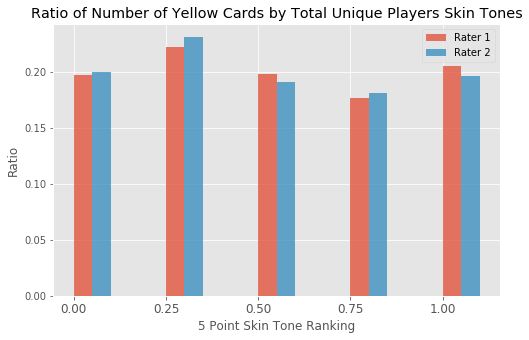

In [374]:
ratio_yellowCards_rater1 = yellowCards_by_player.groupby('rater1').sum()['yellowCards'] / yellowCards_by_player.groupby('rater1').nunique()['playerShort']
ratio_yellowCards_rater2 = yellowCards_by_player.groupby('rater2').sum()['yellowCards'] / yellowCards_by_player.groupby('rater2').nunique()['playerShort']

plt.figure(figsize=(8, 5))
plt.bar(skin_tones, ratio_yellowCards_rater1 / ratio_yellowCards_rater1.sum(), width=0.05, alpha=0.75, align='edge', label='Rater 1')
plt.bar(skin_tones + 0.05, ratio_yellowCards_rater2 / ratio_yellowCards_rater2.sum(), width=0.05, alpha=0.75, align='edge', label='Rater 2')

plt.title('Ratio of Number of Yellow Cards by Total Unique Players Skin Tones')
plt.xlabel('5 Point Skin Tone Ranking')
plt.xticks(skin_tones, ["{:0.2f}".format(skin) for skin in skin_tones], fontsize=12)
plt.ylabel('Ratio')
plt.legend()
plt.show()

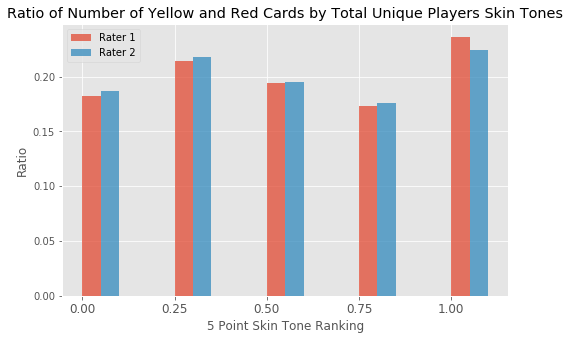

In [375]:
ratio_yellowReds_rater1 = yellowReds_by_player.groupby('rater1').sum()['yellowReds'] / yellowReds_by_player.groupby('rater1').nunique()['playerShort']
ratio_yellowReds_rater2 = yellowReds_by_player.groupby('rater2').sum()['yellowReds'] / yellowReds_by_player.groupby('rater2').nunique()['playerShort']

plt.figure(figsize=(8, 5))
plt.bar(skin_tones, ratio_yellowReds_rater1 / ratio_yellowReds_rater1.sum(), width=0.05, alpha=0.75, align='edge', label='Rater 1')
plt.bar(skin_tones + 0.05, ratio_yellowReds_rater2 / ratio_yellowReds_rater2.sum(), width=0.05, alpha=0.75, align='edge', label='Rater 2')

plt.title('Ratio of Number of Yellow and Red Cards by Total Unique Players Skin Tones')
plt.xlabel('5 Point Skin Tone Ranking')
plt.xticks(skin_tones, ["{:0.2f}".format(skin) for skin in skin_tones], fontsize=12)
plt.ylabel('Ratio')
plt.legend()
plt.show()

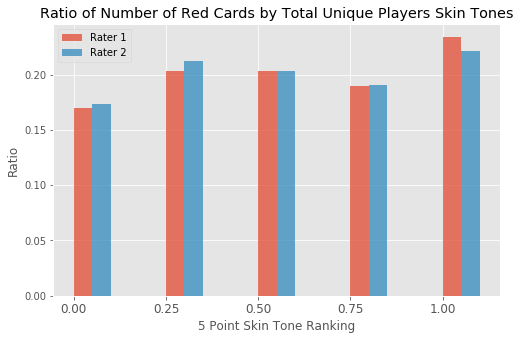

In [376]:
ratio_redCards_rater1 = redCards_by_player.groupby('rater1').sum()['redCards'] / redCards_by_player.groupby('rater1').nunique()['playerShort']
ratio_redCards_rater2 = redCards_by_player.groupby('rater2').sum()['redCards'] / redCards_by_player.groupby('rater2').nunique()['playerShort']

plt.figure(figsize=(8, 5))
plt.bar(skin_tones, ratio_redCards_rater1 / ratio_redCards_rater1.sum(), width=0.05, alpha=0.75, align='edge', label='Rater 1')
plt.bar(skin_tones + 0.05, ratio_redCards_rater2 / ratio_redCards_rater2.sum(), width=0.05, alpha=0.75, align='edge', label='Rater 2')

plt.title('Ratio of Number of Red Cards by Total Unique Players Skin Tones')
plt.xlabel('5 Point Skin Tone Ranking')
plt.xticks(skin_tones, ["{:0.2f}".format(skin) for skin in skin_tones], fontsize=12)
plt.ylabel('Ratio')
plt.legend()
plt.show()

# ANOVA 

Let's compare if there is a statistical difference between the variances in in skin-tone for yellow, yellow-red, and red cards distributed during all games.

### Yellow Cards

In [377]:
pval_rater1 = stats.f_oneway(*[yellowCards_by_player['yellowCards'][yellowCards_by_player['rater1'] == skin_tone].as_matrix() for skin_tone in skin_tones])[1]
pval_rater2 = stats.f_oneway(*[yellowCards_by_player['yellowCards'][yellowCards_by_player['rater2'] == skin_tone].as_matrix() for skin_tone in skin_tones])[1]

print("alpha: {:0.4e}".format(0.05))
print("Rater 1: {:0.4e}, Rater 2: {:0.4e}".format(pval_rater1, pval_rater2))

alpha: 5.0000e-02
Rater 1: 2.1994e-02, Rater 2: 7.5005e-04


### Yellow-Red Cards

In [378]:
pval_rater1 = stats.f_oneway(*[yellowReds_by_player['yellowReds'][yellowReds_by_player['rater1'] == skin_tone].as_matrix() for skin_tone in skin_tones])[1]
pval_rater2 = stats.f_oneway(*[yellowReds_by_player['yellowReds'][yellowReds_by_player['rater2'] == skin_tone].as_matrix() for skin_tone in skin_tones])[1]

print("alpha: {:0.4e}".format(0.05))
print("Rater 1: {:0.4e}, Rater 2: {:0.4e}".format(pval_rater1, pval_rater2))

alpha: 5.0000e-02
Rater 1: 1.9530e-01, Rater 2: 3.1826e-01


### Red Cards

In [379]:
pval_rater1 = stats.f_oneway(*[redCards_by_player['redCards'][redCards_by_player['rater1'] == skin_tone].as_matrix() for skin_tone in skin_tones])[1]
pval_rater2 = stats.f_oneway(*[redCards_by_player['redCards'][redCards_by_player['rater2'] == skin_tone].as_matrix() for skin_tone in skin_tones])[1]

print("alpha: {:0.4e}".format(0.05))
print("Rater 1: {:0.4e}, Rater 2: {:0.4e}".format(pval_rater1, pval_rater2))

alpha: 5.0000e-02
Rater 1: 9.2679e-02, Rater 2: 1.6566e-01


# One Sided T-Test Between Skin Tone Extrema

One drawback to performing ANOVA in this study, is that that it cannot separate bias from the skin-tone rater. As was shown earlier, the perception of skin-tone is biased towards the rater. Notice that rater 1 and 2 had differences in rating players for all skin-tones.

Here statistical significance is tested for each rater between skin tones 0.0 and 1.0.

### Yellow Cards

In [385]:
pval_rater1 = stats.ttest_ind(*[yellowCards_by_player['yellowCards'][yellowCards_by_player['rater1'] == skin_tone].as_matrix() for skin_tone in [0.0, 1.0]])[1] / 2
pval_rater2 = stats.ttest_ind(*[yellowCards_by_player['yellowCards'][yellowCards_by_player['rater2'] == skin_tone].as_matrix() for skin_tone in [0.0, 1.0]])[1] / 2

print("alpha: {:0.4e}".format(0.05))
print("Rater 1: {:0.4e}, Rater 2: {:0.4e}".format(pval_rater1, pval_rater2))

alpha: 5.0000e-02
Rater 1: 3.2375e-01, Rater 2: 4.1559e-01


### Yellow-Red Cards

In [384]:
pval_rater1 = stats.ttest_ind(*[yellowReds_by_player['yellowReds'][yellowReds_by_player['rater1'] == skin_tone].as_matrix() for skin_tone in [0.0, 1.0]])[1] / 2
pval_rater2 = stats.ttest_ind(*[yellowReds_by_player['yellowReds'][yellowReds_by_player['rater2'] == skin_tone].as_matrix() for skin_tone in [0.0, 1.0]])[1] / 2

print("alpha: {:0.4e}".format(0.05))
print("Rater 1: {:0.4e}, Rater 2: {:0.4e}".format(pval_rater1, pval_rater2))

alpha: 5.0000e-02
Rater 1: 4.8832e-02, Rater 2: 1.2419e-01


### Red Cards

In [383]:
pval_rater1 = stats.ttest_ind(*[redCards_by_player['redCards'][redCards_by_player['rater1'] == skin_tone].as_matrix() for skin_tone in [0.0, 1.0]])[1] / 2
pval_rater2 = stats.ttest_ind(*[redCards_by_player['redCards'][redCards_by_player['rater2'] == skin_tone].as_matrix() for skin_tone in [0.0, 1.0]])[1] / 2

print("alpha: {:0.4e}".format(0.05))
print("Rater 1: {:0.4e}, Rater 2: {:0.4e}".format(pval_rater1, pval_rater2))

alpha: 5.0000e-02
Rater 1: 1.3502e-02, Rater 2: 3.9515e-02


In [386]:
redCards_by_ref = data.groupby(['playerShort', 'refNum', 'rater1', 'rater2']).sum()[['redCards']]
redCards_by_ref = redCards_by_ref.reset_index(level=['playerShort', 'refNum', 'rater1', 'rater2'])

In [428]:
pval = np.zeros((redCards_by_ref['refNum'].unique().shape[0], 2))
for i, refNum in enumerate(redCards_by_ref['refNum'].unique()):
    pval[i, 0] = stats.ttest_ind(*[redCards_by_ref['redCards'][np.logical_and(redCards_by_ref['refNum'] == refNum, redCards_by_ref['rater1'] == skin_tone)].as_matrix() for skin_tone in [0.0, 1.0]])[1] / 2
    pval[i, 1] = stats.ttest_ind(*[redCards_by_ref['redCards'][np.logical_and(redCards_by_ref['refNum'] == refNum, redCards_by_ref['rater2'] == skin_tone)].as_matrix() for skin_tone in [0.0, 1.0]])[1] / 2

print("alpha: {:0.4e}".format(0.05))
print("Rater 1: {:0.4e}, Rater 2: {:0.4e}".format(*pval[np.sum(np.isnan(pval), 1) == 0, :].mean(0)))

/Users/pablo/.conda/envs/Insight/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/pablo/.conda/envs/Insight/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


alpha: 5.0000e-02
Rater 1: 2.5470e-01, Rater 2: 2.4560e-01


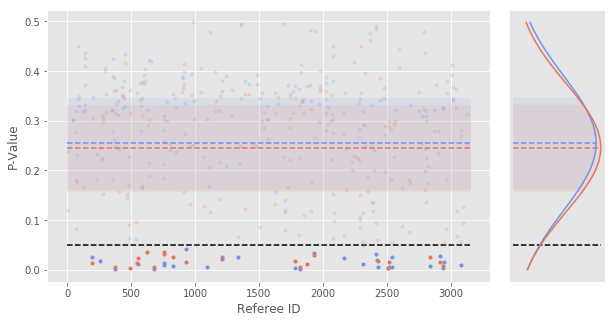

In [527]:
# Define p-values Normal distributions
alpha = 0.05
color=plt.cm.coolwarm(np.linspace(0, 1, 7))
mu1, sigma1 = pval[np.sum(np.isnan(pval), 1) == 0, 0].mean(), pval[np.sum(np.isnan(pval), 1) == 0, 0].std()
mu2, sigma2 = pval[np.sum(np.isnan(pval), 1) == 0, 1].mean(), pval[np.sum(np.isnan(pval), 1) == 0, 1].std()

N1 = stats.norm(mu1, sigma1)
N2 = stats.norm(mu2, sigma2)

# Define range of p-valuess
pval_range = np.linspace(0, np.amax(pval[np.sum(np.isnan(pval), 1) == 0].max()), 100)

# Define p-value quartiles
pval_mid_range1 = np.linspace(N1.ppf(0.25), N1.ppf(0.75), 100)
pval_mid_range2 = np.linspace(N2.ppf(0.25), N2.ppf(0.75), 100)

# Create grid for subplots
plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((3, 5), (0, 0), rowspan=3, colspan=4)
ax2 = plt.subplot2grid((3, 5), (0, 4), rowspan=3, colspan=1)

### Subplot 1
# Plot raw p-values
ax1.plot(redCards_by_ref['refNum'].unique(), pval[:, 0], '.', color=color[1], alpha=0.15)
ax1.plot(redCards_by_ref['refNum'].unique(), pval[:, 1], '.', color=color[5], alpha=0.15)

# Plot significant p-values
ax1.plot(redCards_by_ref['refNum'].unique()[pval[:, 0] < alpha], pval[pval[:, 0] < alpha, 0], '.', color=color[1])
ax1.plot(redCards_by_ref['refNum'].unique()[pval[:, 1] < alpha], pval[pval[:, 1] < alpha, 1], '.', color=color[5])

# Fill quartiles
ax1.fill_betweenx(pval_mid_range1, 0, np.amax(redCards_by_ref['refNum'].unique()), color=color[1], alpha=0.1)
ax1.fill_betweenx(pval_mid_range2, 0, np.amax(redCards_by_ref['refNum'].unique()), color=color[5], alpha=0.1)

# Draw mean markers and alpha level
ax1.hlines(alpha, 0, np.amax(redCards_by_ref['refNum'].unique()), linestyle='--')
ax1.hlines(mu1, 0, np.amax(redCards_by_ref['refNum'].unique()), linestyle='--', color=color[1])
ax1.hlines(mu2, 0, np.amax(redCards_by_ref['refNum'].unique()), linestyle='--', color=color[5])
ax1.set_xlabel('Referee ID')
ax1.set_ylabel('P-Value')

### Subplot 2
# Plot distributions
ax2.plot(N1.pdf(pval_range), pval_range, color=color[1])
ax2.plot(N2.pdf(pval_range), pval_range, color=color[5])

# Fill quartiles
ax2.fill_betweenx(pval_mid_range1, np.zeros(len(pval_range)), N1.pdf(pval_mid_range1), color=color[1], alpha=0.1)
ax2.fill_betweenx(pval_mid_range2, np.zeros(len(pval_range)), N2.pdf(pval_mid_range2), color=color[5], alpha=0.1)

# Draw mean markers and alpha level
ax2.hlines(alpha, 0, np.amax([N1.pdf(mu1), N2.pdf(mu2)]), linestyle='--', color='k')
ax2.hlines(mu1, 0, N1.pdf(mu1), linestyle='--', color=color[1])
ax2.hlines(mu2, 0, N2.pdf(mu2), linestyle='--', color=color[5])

# Hide labels
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
plt.show()

In [469]:
print("""
{:0.2f}% of referees are racist by defintion of Rater 1.
""".format(100 * len(redCards_by_ref['refNum'].unique()[pval[:, 0] < alpha]) / (redCards_by_ref['refNum'].unique().shape[0])))


1.00% of referees are racist by defintion of Rater 1.



In [468]:
print("""
{:0.2f}% of referees are racist by defintion of Rater 2.
""".format(100 * len(redCards_by_ref['refNum'].unique()[pval[:, 1] < alpha]) / (redCards_by_ref['refNum'].unique().shape[0])))


0.76% of referees are racist by defintion of Rater 2.



In [457]:
print("""
{:0.2f}% of racist referees overlap when comparing between both skin-tone ratings.
""".format(100 * len(set(redCards_by_ref['refNum'].unique()[pval[:, 0] < alpha]).intersection(set(redCards_by_ref['refNum'].unique()[pval[:, 1] < alpha]))) / len(set(redCards_by_ref['refNum'].unique()[pval[:, 0] < alpha]).union(set(redCards_by_ref['refNum'].unique()[pval[:, 1] < alpha])))))


54.55% of racist referees overlap when comparing between both skin-tone ratings.



# Conclusions

A little bit! There is some statistically signifanct difference in the number of red cards given to dark-skinned players when compared to light-skinned players. This significance however varies when the relative assignment of skin-tone is varied from one "*rater*" to another.

When however each referee is evaluated on their sole assignment of red-cards by skin-tone, there are clear issues with biased officals.